In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xarray netCDF4 pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.5 MB/s eta 0:00:00


In [3]:
!pip install geopandas shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.7 MB/s eta 0:00:00


In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import xarray as xr
import pandas as pd

sss_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/OISSS_combined_SSS_monthly.nc')
sss = sss_dataset['sss']
df_sss = sss.to_dataframe().reset_index()
df_sss = df_sss.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_sss['longitude'] = (df_sss['longitude'] + 360) % 360

In [16]:
df_sss = df_sss.dropna()

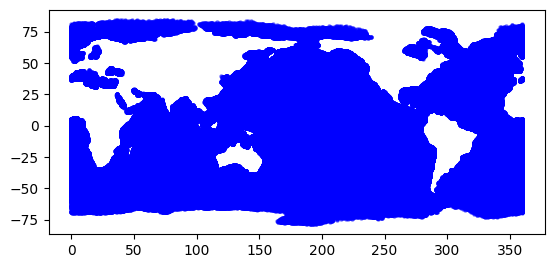

In [17]:
sample = df_sss.sample(frac=0.02, random_state=42)
gdf = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(sample['longitude'], sample['latitude'])])

gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5)
plt.show()

In [7]:
import xarray as xr
import pandas as pd

# Open the first NetCDF file (SST data)
sst_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/MODIS_combined_SST_monthly.nc')
sst = sst_dataset['sst']

# Convert SST data to DataFrame
df_sst = sst.to_dataframe().reset_index()

# Rename columns for clarity
df_sst = df_sst.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})

# Open the second NetCDF file (chlor_a data)
chl_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/MODIS_combined_CHLA_monthly.nc')
chlor_a = chl_dataset['chlor_a']

# Convert chlor_a data to DataFrame
df_chl = chlor_a.to_dataframe().reset_index()
df_chl = df_chl.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})

# Merge SST and chlor_a DataFrames
df_combined = pd.merge(df_sst, df_chl, on=['month', 'latitude', 'longitude'], how='inner')

print(df_combined.shape)

# Repeat the process for SSS
sss_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/OISSS_combined_SSS_monthly.nc')
sss = sss_dataset['sss']
df_sss = sss.to_dataframe().reset_index()
df_sss = df_sss.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_sss['longitude'] = (df_sss['longitude'] + 360) % 360
df_combined = pd.merge(df_combined, df_sss, on=['month', 'latitude', 'longitude'], how='inner')

print(df_combined.shape)


# Repeat the process for POC
poc_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/MODIS_combined_POC_monthly.nc')
poc = poc_dataset['poc']
df_poc = poc.to_dataframe().reset_index()
df_poc = df_poc.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_combined = pd.merge(df_combined, df_poc, on=['month', 'latitude', 'longitude'], how='inner')
print(df_combined.shape)

# Repeat the process for PIC
pic_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/MODIS_combined_PIC_monthly.nc')
pic = pic_dataset['pic']
df_pic = pic.to_dataframe().reset_index()
df_pic = df_pic.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_combined = pd.merge(df_combined, df_pic, on=['month', 'latitude', 'longitude'], how='inner')
print(df_combined.shape)

# Repeat the process for u_wind and v_wind from ASCAT_combined_wind
wind_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/ASCAT_combined_wind_monthly.nc')
u_wind = wind_dataset['u_wind']
v_wind = wind_dataset['v_wind']

df_u_wind = u_wind.to_dataframe().reset_index()
df_u_wind = df_u_wind.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_combined = pd.merge(df_combined, df_u_wind, on=['month', 'latitude', 'longitude'], how='inner')
print(df_combined.shape)

df_v_wind = v_wind.to_dataframe().reset_index()
df_v_wind = df_v_wind.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_combined = pd.merge(df_combined, df_v_wind, on=['month', 'latitude', 'longitude'], how='inner')
print(df_combined.shape)

# Display the first few rows of the final combined DataFrame
df_combined

# Optionally, save the combined DataFrame to a file
# df_combined.to_csv('Combined_SST_ChlorA_SSS_POC_PIC_Wind_data.csv', index=False)
# df_combined.to_parquet('Combined_SST_ChlorA_SSS_POC_PIC_Wind_data.parquet')


(155520000, 5)
(155520000, 6)
(155520000, 7)
(155520000, 8)
(155520000, 9)
(155520000, 10)


,latitude,longitude,month,sst,chlor_a,sss,poc,pic,u_wind,v_wind
0,-89.875,0.125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.875,0.125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.875,0.125,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-89.875,0.125,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-89.875,0.125,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
155519995,89.875,359.875,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155519996,89.875,359.875,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155519997,89.875,359.875,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155519998,89.875,359.875,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


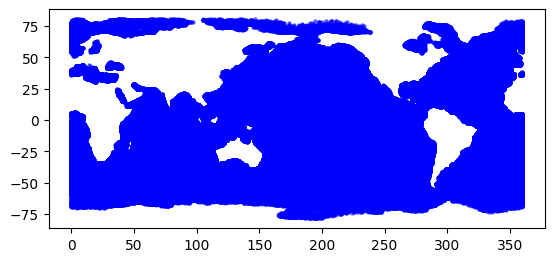

In [13]:
dropped = df_combined.dropna()
dropped.shape
sample = dropped.sample(frac=0.02, random_state=42)
gdf = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(sample['longitude'], sample['latitude'])])

gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5)
plt.show()

In [14]:
df_combined.to_csv('/content/drive/MyDrive/STS/STSData/combined_satellite_X.nc', index=False)
print('Done!')

Done!


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
sss_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/OISSS_combined_SSS_monthly.nc')
sss = sss_dataset['sss']
df_sss = sss.to_dataframe().reset_index()
df_sss = df_sss.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_sss

,latitude,longitude,month,sss
0,-89.875,-179.875,0,NaN
1,-89.875,-179.875,1,NaN
2,-89.875,-179.875,2,NaN
3,-89.875,-179.875,3,NaN
4,-89.875,-179.875,4,NaN
...,...,...,...,...
155519995,89.875,179.875,145,NaN
155519996,89.875,179.875,146,NaN
155519997,89.875,179.875,147,NaN
155519998,89.875,179.875,148,NaN


In [ ]:
sst_dataset = xr.open_dataset('/content/drive/MyDrive/STS/STSData/MODIS_combined_SST_monthly.nc')
sst = sst_dataset['sst']

# Convert SST data to DataFrame
df_sst = sst.to_dataframe().reset_index()

# Rename columns for clarity
df_sst = df_sst.rename(columns={'time': 'month', 'lat': 'latitude', 'lon': 'longitude'})
df_sst

,latitude,longitude,month,sst
0,-89.875,0.125,0,NaN
1,-89.875,0.125,1,NaN
2,-89.875,0.125,2,NaN
3,-89.875,0.125,3,NaN
4,-89.875,0.125,4,NaN
...,...,...,...,...
155519995,89.875,359.875,145,NaN
155519996,89.875,359.875,146,NaN
155519997,89.875,359.875,147,NaN
155519998,89.875,359.875,148,NaN


In [ ]:
df_sst['longitude'].equals(df_sss['longitude'])

True